# 1. Jupyter Notebook and NumPy Warmup

We will make extensive use of Python's numerical arrays (NumPy) and interactive plotting (Matplotlib) in Jupyter notebooks for the course assignments. The first part of this assignment is intended as a gentle warm up in case you haven't used these tools before. Start by reading through the following tutorials:

If you haven't used Jupyter before, a good place to start is with the introductory documentation here:

https://jupyter-notebook.readthedocs.io/en/stable/notebook.html#starting-the-notebook-server
https://nbviewer.jupyter.org/github/jupyter/notebook/blob/master/docs/source/examples/Notebook/Notebook%20Basics.ipynb
https://nbviewer.jupyter.org/github/jupyter/notebook/blob/master/docs/source/examples/Notebook/Running%20Code.ipynb


This page gives a good introduction to NumPy and many examples of using NumPy along with Matplotlib:

http://www.scipy-lectures.org/intro/numpy/numpy.html

You should also get comfortable with searching through the documentation as needed

https://docs.scipy.org/doc/numpy-1.13.0/reference/index.html
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html



# ***

### NumPy Array Operations

Describe in words what each of each of the following statements does and what the value of `result` will be (i.e. if you were to execute `print(result)`). You should do this with out actually executing the code but instead just looking it and refering to the NumPy documentation. 

***
**[1.1]**

```
import numpy as np
a = np.arange(5,15)
result = a[::3]
```

This creates an array from 5 to 15 i.e [5 6 7 8 9 10 11 12 13 14]

Then goes through the whole array iterating by 3 and slicing it into result (not sure if slicing is the correct term)

***
**[1.2]**

```
a = np.arange(1,5)
result = a[::-1]
```

This creates an array from 1 to 5 (exclusive) [1 2 3 4]

Then goes through the whole array backwards, starting at 4 and going until 1

***
**[1.3]**

```
f = np.arange(1840,1860)
g = np.where(f>1850)
result = f[g]
```

This creates an array from 1840 to 1860 [1840 1841 1842.... 1859]

Also creates another array from a slice of F starting at 1850 and going to 1860 [1850 1851...1859]

Finally creates a result array as a copy with the same shape as g using the data of f

***
**[1.4]**

```
x = np.ones((1,10))
result = x.sum(axis=1)
```

Creates an array of ten ones in floating point (1.0)

Then sums every item in the array together (1.0 + 1.0 + 1.0 +...) with the resulting equaling 10.0 and that value being in its own array

***
## NumPy Coding Exercises

Add or modify the code in the cells below as needed to carry out the following steps.

**[1.5]**

Use **matplotlib.pyplot.imread** to load in a grayscale image of your choice. If you don't have a grayscale image handy, load in a color image and then convert it to grayscale averaging together the three color channels (use **numpy.mean**).

Finally create an array A that contains the pixels in a 100x100 sub-region of your image and display the image in the notebook using the **matplotlib.pyplot.imshow** function. 

**HINT:** When loading an image with **imread** it is important to example the data type of the returned array. Depending on the image it may be that `I.dtype = uint8` or `I.dtype = float32`. Integer values range in [0..255] while floating point values for an image will be in [0..1].  A simple approach is to always convert images to floats, this will avoid much confusion and potential bugs later on.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

#load an image
I = plt.imread('grayscale.jpg')

#display the shape of the array and data type
print("I.shape=",I.shape,"\nI.dtype=",I.dtype)

#convert to float data type and scale to [0..1] if necessary
if (I.dtype == np.uint8):
    I = I.astype(float) / 256
    
#I.dtype should now be float

#if your image is color (shape HxWx3), convert to grayscale by averaging together R,G,B values
#I = np.mean(I)
average = (I[:,:,0] +I[:,:,1] + I[:,:,2])/3


#Image[0,0] = (ImageRGB[0,0,0] + ImageRGB[0,0,1] + ImageRGB[0,0,2])/3


#display the image in the notebook using a grayscale colormap
plt.imshow(average,cmap=plt.cm.gray)

#force matplotlib to go ahead and display the plot now
plt.show()   

#select out a 100x100 pixel subregion of the image
A = average[200:300, 300:400]

#display the selected subregion
#plt.imshow(0.1*A,cmap=plt.cm.gray)
plt.imshow(A,cmap=plt.cm.gray)
plt.show()


I.shape= (576, 768, 3) 
I.dtype= uint8


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

***
**[1.6]** 

In the cell below, describe what happens if you comment out the `plt.show()` lines?  

How does the visualization of `A` change if you scale the brightness values (i.e. `plt.imshow(0.1*A,cmap=plt.cm.gray)`)? 

Explain what is happening, referring to the **matplotlib** documentation as necessary (https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html)

Only the second image of the 100x100 slice would show, as it was the most recently set image for the plot.
The second one, scaling the brightness value adjusts the brightness on the image. So a smaller number scaling A, will make the image not as bright.

***
**[1.7]**

Write code in the cell below which (a) puts the values of `A` into a singe 10,000-dimensional column vector `x`, (b) sorts the entries in `x`, and (c) visualizes the contents of the sorted vector `x` by using the **matplotlib.pyplot.plot** function


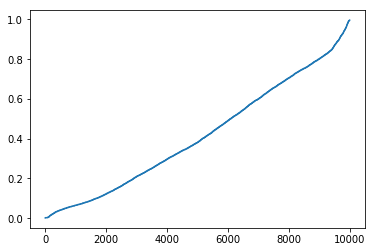

In [2]:
x = np.ndarray.flatten(A)
#x = np.reshape(x,(10000,1))
x = np.sort(x)
plt.plot(x)

***

**[1.8]**

Display a figure showing a histogram of the pixel intensities in `A` using **matplotlib.axes.hist**. Your histogram should have 16 bins. You will need to convert `A` to a vector in order for the histogram to display correctly (otherwise it will show 16 bars for each row of A)


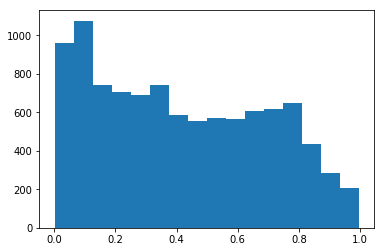

In [4]:
V = np.ndarray.flatten(A)
I = plt.hist(V,16)


***
**[1.9]** 

Create and display a new (binary) image the same size as `A`, which is white wherever the intensity in `A` is greater than a threshold specified by a variable `t`, and black everywhere else. Experiment in order to choose a value for the threshold which makes the image roughly half-white and half-black. Also print out the percentage of pixels which are black for your chosen threshold.


0.5166


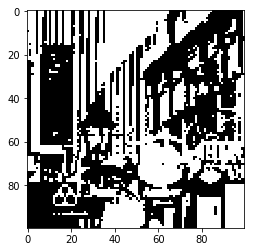

In [4]:
t = 0.4

newImg = np.copy(A)

newImg[newImg > t] = 255
newImg[newImg <= t] = 0

white = np.count_nonzero(newImg>t)
black = np.count_nonzero(newImg <= t)

print(black/(black+white))
plt.imshow(newImg, cmap=plt.cm.gray)
plt.show()


***
**[1.10]**

Generate a new grayscale image, which is the same as A, but with A's mean intensity value subtracted from each pixel. After subtracting the mean, set any negative values to 0 and display the result.


Intesity:  0.415069140625


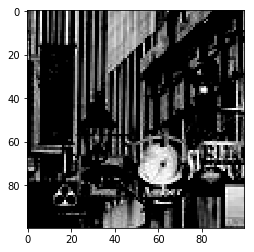

In [5]:
mean = np.mean(A)
print("Intesity: ", mean)
subtractedImage = np.subtract(A,mean)
# Or I[::] -= mean
subtractedImage[subtractedImage < 0] = 0

plt.imshow(subtractedImage, cmap=plt.cm.gray)
plt.show()

***
**[1.11]**

Let `y` be a column vector: `y = [1, 2, 3, 4, 5, 6]` so that `y.shape = (6,1)`. Reshape the vector into a matrix `z` using the **numpy.array.reshape** and (**numpy.array.transpose** if necessary) to form a new matrix `z` whose first column is `[1, 2, 3]`, and whose second column is `[4, 5, 6]`. Print out the resulting array `z`



In [6]:
y = np.arange(1,7)
y = np.reshape(y, (2,3))
y = np.transpose(y)

# Or it could be one liner
#print(np.transpose(np.reshape(np.arange(1,7), (2,3))))

print(y)

[[1 4]
 [2 5]
 [3 6]]


***
**[1.12]**

Find the minimum value of `A`, if there are multple entries with the same minimum value it is fine to return the first one.  Set `r` to be the row in which it occurs and `c` to be the column. Print out `r`, `c`, and `A[r,c]`


In [7]:
minVal = np.min(A)
rc = np.argwhere(A == minVal)
#print(minVal)
r = rc[0][0]
c = rc[0][1]
print("r:", r)
print("c:", c)
print("A[r,c]: ", A[r,c])

r: 29
c: 84
A[r,c]:  0.0013020833333333333


***
**[1.13]**

Let v be the vector: `v = [1,8,8,2,1,3,9,8]`. Using the unique function, compute and print the total number of unique values that occur in `v`.

In [8]:
v = [1,8,8,2,1,3,9,8]
uniqueVector = np.unique(v, return_counts = True)
print("Unique Numbers: \t", (uniqueVector[0]))
print("Num Times Appears: \t", uniqueVector[1])
print("Total Unique Values: \t", len(uniqueVector[0]))

Unique Numbers: 	 [1 2 3 8 9]
Num Times Appears: 	 [2 1 1 3 1]
Total Unique Values: 	 5


***
# 2. Averaging Images [40pts]

In this exercise you will write code which loads a collection of images (which are all the same size), computes a pixelwise average of the images, and displays the resulting average.

The images below give some examples that were generated by averaging "100 unique commemorative photographs culled from the internet" by Jason Salavon. Your program will do something similar.

￼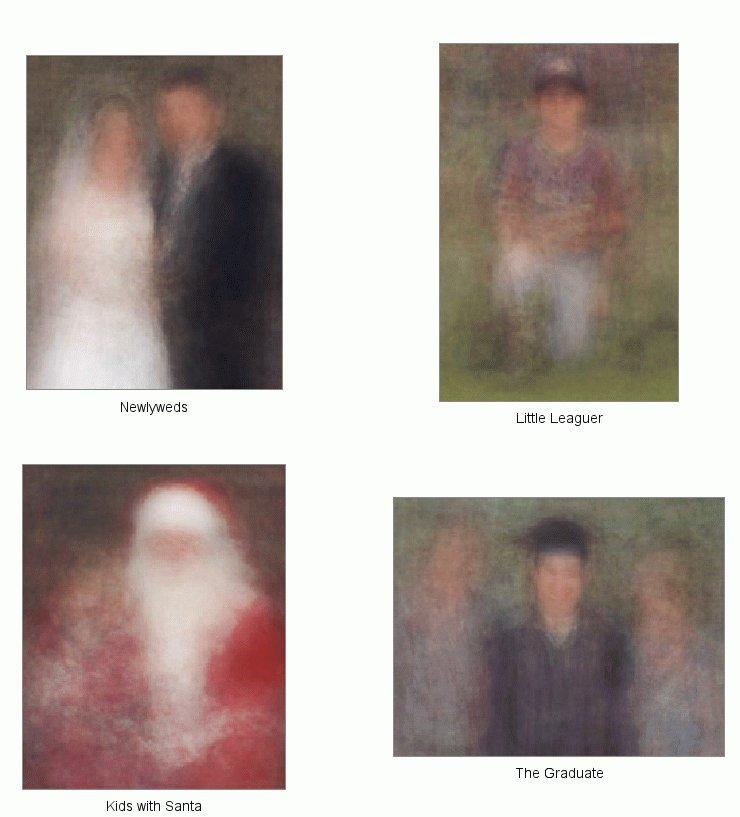


***

Download the images provided on the Canvas course website for this assignment `averageimage_data.zip`. There are two sets, `set1` and `set2`. Notice that they are all the same size within a single set.

***

**[2.1]**

Write a function in the cell below that loads in one of the sets of images and computes their average. You can use the **os.listdir** to get the list of files in the directory. As you load in the images, you should compute an average image on the fly. Color images are represented by a 3-dimensional array of size (HxWx3) where the third dimension indexes the red, green and blue channels. You will want to compute a running average of the red, green and blue slices in order to get your final average color image. 

You should encapsulate your code in a function called **average_image** that takes the image directory as an input and returns the average of the images in that directory. Your function should implement some error checking. Specifically your function should skip over any files in the directory that are not images (**plt.imread** will thrown an **OSError** if the file is not an image). It should ignore images that are not color images. Finally, it should also skip any images which are not the same height and width as the first color image you load in.


In [9]:
#
# these are the only modules needed for problem #2
#
import numpy as np
import os
import matplotlib.pyplot as plt


In [10]:
def average_image(dirname):
    """
    Computes the average of all color images in a specified directory and returns the result.
    
    The function ignores any images that are not color images and ignores any images that are not
    the same size as the first color image you load in
    
    Parameters
    ----------
    dirname : str
        Directory to search for images
        
    Returns
    -------
    numpy.array (dtype=float)
        HxWx3 array containing the average of the images found
        
    """
 
    #[your code here]
    

    Iaverage = 0
    numPics = 0
    height = 0
    width = 0
    initialHeight = None
    initialWidth = None

    for file in os.listdir(dirname):
        filename = os.path.join(dirname, file)
        if os.path.isfile(filename):
            # Read the file in
            I = plt.imread(filename)
            # Checking if image is color
            if len(I.shape) == 3:
                # Convert to float
                if (I.dtype == np.uint8):
                    I = I.astype(float) / 256
                    
                if initialHeight == None and initialWidth == None:
                    initialHeight = I.shape[0]
                    initialWidth = I.shape[1]
                    height = I.shape[0]
                    width = I.shape[1]
                    numPics = 1
                    sum = I    
                elif I.shape[0] == height and I.shape[1] and initialHeight != None and initialWidth != None:
                    # Read the image from the filename
                    numPics = numPics + 1
                    sum = np.add(sum,I)
                    Iaverage = sum / numPics

    return Iaverage

***
**[2.2]**

Write code below which calls your **average_image()** function twice, once for each set of images. Display the resulting average images. Also display a single example image from each set for comparison


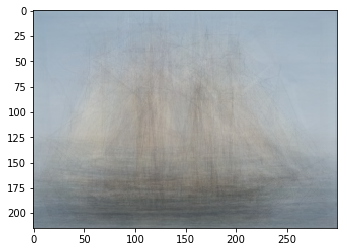

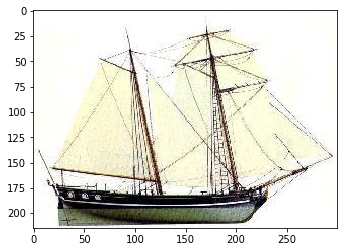

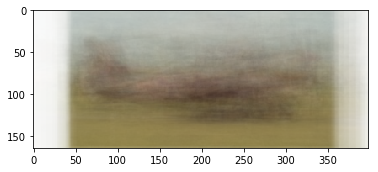

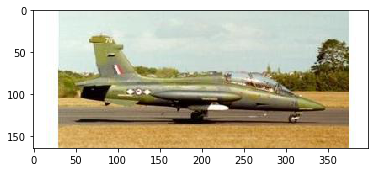

In [11]:
averageImgSet1 = average_image("set1")
plt.imshow(averageImgSet1)
plt.show()

exampleImg1 = plt.imread('set1img01.jpg')
plt.imshow(exampleImg1)
plt.show()

averageImgSet2 = average_image("set2")
plt.imshow(averageImgSet2)
plt.show()

exampleImg2 = plt.imread('set2img01.jpg')
plt.imshow(exampleImg2)
plt.show()

***
**[2.3]**

Provide a description of the appearance of the average images.  Give an explanation as to why the average image
does not look like the individual example images.

The images have a faint outline of a picture representing a jet and a boat. They don't look like one specific individual example because we are taking the average RGB value at each pixel location for many different photos

***
# 3. Color sensor demosaicing [40pts]

As discussed in class, there are several steps to transform raw sensor measurements into nice looking images. These steps include Demosaicing, White Balancing and Gamma Correction. In this problem we will implement the demosaicing step. (see Szeliski Chapter 2.3) In the assignment data directory on Canvas there is a zip file containing raw images from a Canon 20D camera as well as corresponding JPEG images from the camera (`*.JPG`). The raw image files (`*.CR2`) have been converted to 16-bit PGM images (`*.pgm`) using David Coffin's dcraw program to make it easy to load them in as arrays using the supplied code below **read_pgm**

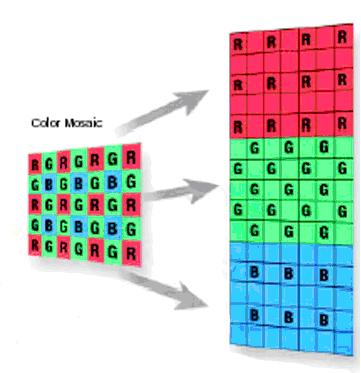

Bayer RGGB mosaic.

The raw image has just one value per pixel. The sensor is covered with a filter array that modifies the sensitivity curve of each pixel. There are three types of filters: "red", "green", and "blue", arranged in the following pattern repeated from the top left corner:

```
R G . . .
G B
.
.
.
```

Your job is to compute the missing color values at each pixel to produce a full RGB image (3 values at each pixel location). For example, for each "green" pixel, you need to compute "blue" and "red" values. Do this by interpolating values from adjacent pixels using the linear interpolation scheme we described in class.

In [12]:
#
# these are the only modules needed for problem #3
#
import numpy as np
import matplotlib.pyplot as plt

#
# this function will load in the raw mosaiced data stored in the pgm file
#
def read_pgm(filename):
    """
    Return image data from a raw PGM file as a numpy array
    Format specification: http://netpbm.sourceforge.net/doc/pgm.html
    
    """
    infile = open(filename,'r',encoding="ISO-8859-1")
    
    # read in header
    magic = infile.readline()
    width,height = [int(item) for item in infile.readline().split()]
    maxval = infile.readline()
    
    # read in image data and reshape to 2D array, convert 16bit to float
    image = np.fromfile(infile, dtype='>u2').reshape((height, width))
    image = image.astype(float)/65535.
    return image


***
**[3.1]**

Implement a function ``demosaic`` which takes an array representing the raw image and returns a standard color image. To receive full credit, you should implement this using NumPy indexing operations like you practiced in the first part of the assignment. You should not need any for loops over individual pixel locations. You can accomplish this by either using array subindexing or alternately by using the imfilter function with the appropriate choice of filter.


In [13]:
def demosaic(I):
    """
    Demosaic a Bayer RG/GB image to an RGB image.
             
    Parameters
    ----------
    I : numpy.array  (dtype=float)
        RG/GB mosaic image of size  HxW
         
    Returns
    -------
    numpy.array (dtype=float)
    HxWx3 array containing the demosaiced RGB image
 
    """
    
    ##############
    ## RED
    ##############
    # Initialize array with zeros to start
    my_red = np.zeros((I.shape[0], I.shape[1]))

    # Copies the pixels which have actual red values stored
    my_red[::2, ::2] = I[::2, ::2]
    
    # Left and Right Interpolation
    my_red[::2,1:-1:2] = (my_red[::2,0:-3:2] + my_red[::2,2:-1:2]) / 2
    
    # Above and Below Interpolation
    my_red[1:-1:2,::2] = (my_red[0:-3:2,::2] + my_red[2:-1:2,::2]) / 2

    # Bottom Edge Interpolation
    my_red[-1,:] = my_red[-2,:]
    
    # Right Edge Interpolation
    my_red[:,-1] = my_red[:,-2]  

    # Center Interpolation
    my_red[1:-1:2,1:-2:2] = (my_red[0:-3:2,1:-2:2] + my_red[2:-1:2,1:-2:2] + my_red[1:-2:2,0:-3:2] + my_red[1:-2:2,2:-1:2]) / 4
    
    # Bottom Right Corner Interpolation
    my_red[-1,-1] = (my_red[-1,-2] + my_red[-2,-1]) / 2    
    
    ##############
    # GREEN
    ##############
    # Fill with zeros
    my_green = np.zeros((I.shape[0], I.shape[1]))
    
    # Copies the pixels which have actual green values stored
    my_green[0::2,1::2] = I[0::2,1::2]
    my_green[1::2,0::2] = I[1::2,0::2]
    
    # Left Edge Interpolation
    my_green[2:-1:2,0] = (my_green[1:-2:2,0] + my_green[3::2,0] + my_green[2:-1:2,1]) / 3

    # Right Edge Interpolation
    my_green[1:-2:2,-1] = (my_green[0:-2:2,-1] + my_green[2::2,-1] + my_green[1:-2:2,-2]) / 3

    # Top Edge Interpolation
    my_green[0,2:-1:2] = (my_green[0,1:-2:2] + my_green[0,3::2] + my_green[1,2:-1:2]) / 3

    # Bottom Edge Interpolation
    my_green[-1,1:-2:2] = (my_green[-1,0:-3:2] + my_green[-1,2:-1:2] + my_green[-2,1:-2:2]) / 3
    
    # Center Interpolation
    my_green[1:-1:2,1:-1:2] = (my_green[0:-2:2,1:-1:2] + my_green[2::2,1:-1:2] + my_green[1:-1:2,0:-2:2] + my_green[1:-1:2,2::2]) / 4

    # Center Interpolation
    my_green[2:-1:2,2:-1:2] = (my_green[1:-2:2,2:-1:2] + my_green[3::2,2:-1:2] + my_green[2:-1:2,1:-2:2] + my_green[2:-1:2,3::2]) / 4
    
    # Top Left Corner Interpolation
    my_green[0,0] = (my_green[0,1] + my_green[1,0]) / 2

    # Bottom Right Corner Interpolation
    my_green[-1,-1] = (my_green[-1,-2] + my_green[-2,-1]) / 2
    
    ###############
    ## BLUE
    ###############
    
    # Initialize array with zeros to start
    my_blue = np.zeros((I.shape[0], I.shape[1]))
    
    # Copies the pixels which have actual blue values stored
    my_blue[1::2,1::2] = I[1::2,1::2]

    # Above and Below Interpolation
    my_blue[2:-1:2,1::2] = (my_blue[1:-2:2,1::2] + my_blue[3::2,1::2]) / 2

    # Left and Right Interpolation
    my_blue[1::2,2:-1:2] = (my_blue[1::2,1:-1:2] + my_blue[1::2,3::2]) / 2

    # Center Interpolation
    my_blue[2:-1:2,2:-1:2] = (my_blue[2:-1:2,1:-2:2] + my_blue[2:-1:2,3::2] + my_blue[1:-2:2,2:-1:2] + my_blue[3::2,2:-1:2]) /4
    
    # Top Edge Interpolation
    my_blue[0,1:] = my_blue[1,1:]

    # Right Edge Interpolation
    my_blue[1:,0] = my_blue[1:,1]

    # Top Right Corner Interpolation
    my_blue[0,0] = (my_blue[0,1] + my_blue[1,0]) / 2

   
    #if (I.dtype == np.uint8):
    #     I = I.astype(float) / 256
    #RGB_Array = zip((my_red, my_green, my_blue))
    
    # Create an empty Image to fill with our 2D arrays
    I = np.zeros((I.shape[0],I.shape[1],3), dtype=np.float64)
    I[:,:,0] = my_red
    I[:,:,1] = my_green
    I[:,:,2] = my_blue
    
    return I
   

***
**[3.2]**

Write code and comments below that demonstrate the results of your demosaic function using `IMG_1308.pgm`. You are encouraged to include multiple examples for illustration. Since the images are so large, work with just the upper-left 500x500 pixel sub-block for illustrations.

You should display: (a) the original raw image with a grayscale colormap, (b) the resulting RGB image after demosaicing, (c) the corresponding part of the provided JPG file from the camera 


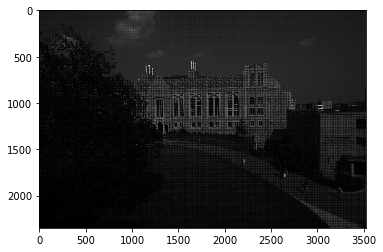

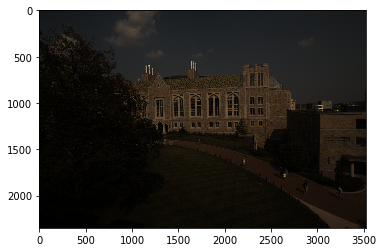

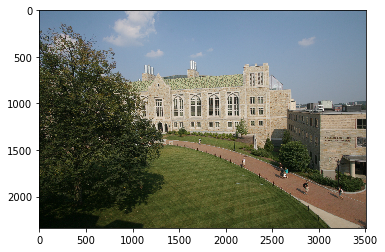

In [14]:
Iraw = read_pgm("IMG_1308.pgm")
plt.imshow(Iraw,cmap=plt.cm.gray)
plt.show()

Demosaiced = demosaic(Iraw)
plt.imshow(Demosaiced)
plt.show()

JPGFinished = plt.imread('IMG_1308.JPG')
plt.imshow(JPGFinished)
plt.show()


***
**[3.3]**

The correctly demosaiced image will appear darker than the JPG version provided. Provide an explanation of why this is the case based on your reading about the digital camera pipeline.


The Digital Camera pipeline attempts to perform a bit of color balancing before outputting a final image. It attempts to move the white point of a given image closer to the actual white, than what is initially taken in from the camera. We still need to add our gamma and linearize for our image to come out as nice and light as the jpg.